In [53]:
import cv2
from imwatermark import WatermarkEncoder, WatermarkDecoder
import matplotlib.pyplot as plt 
import numpy as np



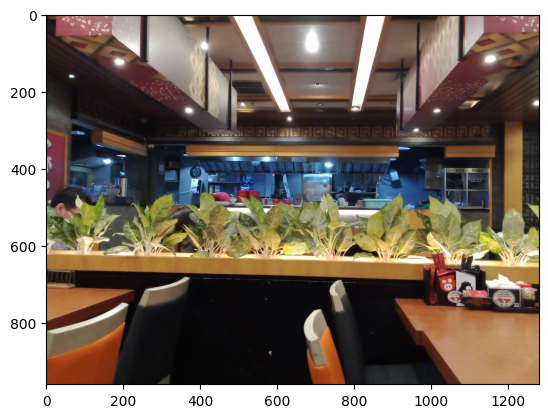

In [63]:

bgr = cv2.imread('test.jpg')
wm = 'test'

encoder = WatermarkEncoder()
encoder.set_watermark('bytes', wm.encode('utf-8'))
bgr_encoded = encoder.encode(bgr, 'dwtDct')
plt.imshow(bgr_encoded[:,:,::-1])


In [51]:
decoder = WatermarkDecoder('bytes', 32)
watermark = decoder.decode(bgr_encoded, 'dwtDct')
print("Got here")
try:
  text  = watermark.decode('utf-8')
  print(text)
except Exception:
  print("Unable to decode watermark")
print(watermark.decode('utf-8'))



Got here
test
test


In [55]:
def testit(img_path):
    bgr = cv2.imread(img_path)
    decoder = WatermarkDecoder('bytes', 136)
    watermark = decoder.decode(bgr, 'dwtDct')
    try:
        dec = watermark.decode('utf-8')
    except:
        dec = "null"
    print(dec)


In [64]:
def put_watermark(img, wm_encoder=None):
    if wm_encoder is not None:
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = wm_encoder.encode(img, 'dwtDct')
        img = Image.fromarray(img[:, :, ::-1])
    return img

original_image = cv2.imread("test.png")
watermarked_image = put_watermark(original_image, 'dwtDct')
plt.imshow(watermarked_image[:,:,::-1])
testit(watermarked_image)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


TypeError: encode() argument 'encoding' must be str, not numpy.ndarray